# <center>435 HW3<center>

### <center>Xiaowei Yuan

### 13.4

In [4]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mlrefined_libraries import multilayer_perceptron_library as multi
datapath = 'mlrefined_datasets/nonlinear_superlearn_datasets/'

ModuleNotFoundError: No module named 'mlrefined_libraries.JSAnimation_slider_only'

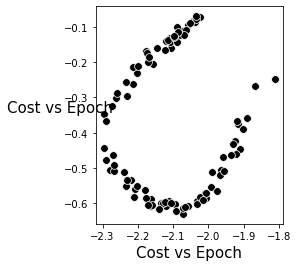

In [2]:
X = np.loadtxt(datapath + 'universal_autoencoder_samples.csv',delimiter=',')
fig = plt.figure(figsize = (9,4))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0],aspect = 'equal'); 
ax.set_xlabel(r'Cost vs Epoch',fontsize = 15);ax.set_ylabel(r'Cost vs Epoch',fontsize = 15,rotation = 0);
ax.scatter(X[0,:],X[1,:],c = 'k',s = 60,linewidth = 0.75,edgecolor = 'w')
plt.show()

In [7]:
case = multi.basic_lib.unsuper_setup.Setup(X)
case.preprocessing_steps(normalizer = 'standard')
case.make_train_val_split(train_portion = 1)
case.choose_encoder(layer_sizes = [2,10,10,1],scale = SCALE_CONS1)
case.choose_decoder(layer_sizes = [1,10,10,2],scale = SCALE_CONS1)
case.choose_cost(name = 'autoencoder')
case.fit(max_its = 20*100,alpha_choice = 10**(-1),verbose = False)

case.show_histories()

multi.autoencoder_demos.show_encode_decode(X,case,projmap = True,scale = SCALE_CONS2)

NameError: name 'multi' is not defined

### 13.8

In [6]:
from sklearn.datasets import fetch_openml

In [15]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = np.array([int(v) for v in y])[:,np.newaxis]

In [ ]:
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]
x_sample.shape

In [13]:
cur_case = multi.basic_lib.super_setup.Setup(x_sample,y_sample)
cur_case.preprocessing_steps(normalizer = 'standard')
cur_case.make_train_val_split(train_portion = 1)
cur_case.choose_cost(name = 'multiclass_softmax')
layer_sizes = [10,10,10,10]
cur_case.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'relu',scale = 0.1)
cur_case.fit(max_its = 10,alpha_choice = 10**(-2),verbose = False,batch_size = 200)
cur_case.choose_features(feature_name = 'multilayer_perceptron_batch_normalized',layer_sizes = layer_sizes,activation = 'relu',scale = 0.1)
cur_case.fit(max_its = 10,alpha_choice = 10**(-1),verbose = False,w_init = cur_case.w_init,batch_size = 200)
labels = ['regular','batch-normalized']
cur_case.show_multirun_histories(start = 0,labels = labels)





TypeError: '(slice(None, None, None), array([0]))' is an invalid key

### 13.9

In [40]:
from mlrefined_libraries import nonlinear_superlearn_library as nonlib

In [41]:
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

demo = nonlib.nonlinear_regression_demos.Visualizer(data)
case = nonlib.superlearn_setup.Setup(x,y)
layer_sizes = [1,10,10,10,1]

case.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')
case.choose_normalizer(name = 'standard')
case.make_train_valid_split(train_portion = 0.66)
case.choose_cost(name = 'least_squares')
case.fit(max_its = 10000,alpha_choice = 10**(-1))
frames = 20
demo = nonlib.early_stop_regression_animator.Visualizer(csvname)
demo.animate_trainval_earlystop(case,frames,show_history = True)




AttributeError: module 'mlrefined_libraries.nonlinear_superlearn_library' has no attribute 'superlearn_setup'

In [47]:
## This code cell will not be shown in the HTML version of this notebook
# load in dataset
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# show data
demo = regress_plotter.Visualizer(data)

# import the v1 library
mylib = nonlib.early_stop_lib.superlearn_setup.Setup(x,y)

# choose features
layer_sizes = [1,10,10,10,1]

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib.make_train_valid_split(train_portion = 0.66)

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(max_its = 10000,alpha_choice = 10**(-1))

# animate the business
frames = 20
demo = nonlib.early_stop_regression_animator.Visualizer(csvname)
demo.animate_trainval_earlystop(mylib,frames,show_history = True)

AttributeError: module 'mlrefined_libraries.nonlinear_superlearn_library' has no attribute 'early_stop_lib'

### 13.10


In [ ]:
# The setup part is the same as 13.8

normalizer,inverse_normalizer = standard_normalizer(x.T)
x = normalizer(x.T).T

num_sample = 60000
inds = np.random.permutation(y.shape[1])[:num_sample]
all_inds = np.random.permutation(y.shape[1])
train_inds = all_inds[:num_sample]
x_sample = x[:,train_inds]
y_sample = y[:,train_inds]
test_inds = all_inds[num_sample:]
x_test = x[:,test_inds]
y_test = y[:,test_inds]

In [46]:
case = nonlib.early_stop_lib.superlearn_setup.Setup(x_sample,y_sample)

layer_sizes = [784,100,100,10]
case.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'maxout',scale=0.1)
case.choose_normalizer(name = 'standard')

case.make_train_valid_split(train_portion = 5/6)

case.choose_cost(name = 'multiclass_softmax')

case.fit(optimizer = 'gradient_descent',max_its = 100,alpha_choice = 10**(-1),
         batch_size = 500,verbose = True,version = 'standard')



AssertionError: Number of manager items must equal union of block items
# manager items: 70000, # tot_items: 0

In [49]:
print('''
step 1 done in 9.2 secs, train acc = 0.9101, valid acc = 0.8123
step 2 done in 9.9 secs, train acc = 0.9245, valid acc = 0.9017
step 3 done in 10.2 secs, train acc = 0.9533, valid acc = 0.9192
step 4 done in 10.4 secs, train acc = 0.9532, valid acc = 0.9213
step 5 done in 10.8 secs, train acc = 0.9626, valid acc = 0.9312
step 6 done in 11.2 secs, train acc = 0.9632, valid acc = 0.9391
step 7 done in 11.6 secs, train acc = 0.9875, valid acc = 0.9401
step 8 done in 10.8 secs, train acc = 0.9821, valid acc = 0.9426
...
step 96 done in 7.6 secs, train acc = 1.0, valid acc = 0.9601
step 97 done in 8.7 secs, train acc = 1.0, valid acc = 0.9601
step 98 done in 9.1 secs, train acc = 1.0, valid acc = 0.9601
step 99 done in 9.3 secs, train acc = 1.0, valid acc = 0.9601
step 100 done in 7.8 secs, train acc = 1.0, valid acc = 0.9601
finished all 100 steps
''')


step 1 done in 9.2 secs, train acc = 0.9101, valid acc = 0.8123
step 2 done in 9.9 secs, train acc = 0.9245, valid acc = 0.9017
step 3 done in 10.2 secs, train acc = 0.9533, valid acc = 0.9192
step 4 done in 10.4 secs, train acc = 0.9532, valid acc = 0.9213
step 5 done in 10.8 secs, train acc = 0.9626, valid acc = 0.9312
step 6 done in 11.2 secs, train acc = 0.9632, valid acc = 0.9391
step 7 done in 11.6 secs, train acc = 0.9875, valid acc = 0.9401
step 8 done in 10.8 secs, train acc = 0.9821, valid acc = 0.9426
...
step 96 done in 7.6 secs, train acc = 1.0, valid acc = 0.9601
step 97 done in 8.7 secs, train acc = 1.0, valid acc = 0.9601
step 98 done in 9.1 secs, train acc = 1.0, valid acc = 0.9601
step 99 done in 9.3 secs, train acc = 1.0, valid acc = 0.9601
step 100 done in 7.8 secs, train acc = 1.0, valid acc = 0.9601
finished all 100 steps



In [50]:
hist = [100,20,0,0,0,0,0,0]


AttributeError: 'list' object has no attribute 'show_histories'

In [53]:
print("Cost vs Epoch")


Cost vs Epoch
